# Project 3 Yunseok Jang

1) Apply dimension reduction methods – specifically a PCA – to the data in columns 421-474. As laid out above, these columns contain self-report answers to personality and how these individuals experience movies, respectively. It is us to you whether you do one PCA each for personality and movie experience, or one overall, but regardless of that, we would like you to:

a) Determine the number of factors (principal components) that you will interpret meaningfully (by a criterion of your choice – but make sure to name that criterion). Include a Scree plot in your answer.

b) Semantically interpret what those factors represent (hint: Inspect the loadings matrix).

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")


df1 = pd.read_csv('.\movieReplicationSet.csv')
df2 = np.genfromtxt('.\movieReplicationSet.csv', delimiter = ',', skip_header = 1)


data = df1.iloc[:,420:474]
avg = data.mean(axis = 0, skipna = True)

data.fillna(avg, inplace = True)

print(data)

      Is talkative  Tends to find fault with others  Does a thorough job  \
0              1.0                              2.0              4.04912   
1              2.0                              3.0              4.00000   
2              4.0                              2.0              4.00000   
3              5.0                              3.0              5.00000   
4              4.0                              4.0              4.00000   
...            ...                              ...                  ...   
1092           4.0                              4.0              4.00000   
1093           5.0                              5.0              5.00000   
1094           4.0                              2.0              5.00000   
1095           4.0                              2.0              4.00000   
1096           5.0                              4.0              5.00000   

      Is depressed/Blue  Is original/comes up with new ideas  Is reserved  \
0         

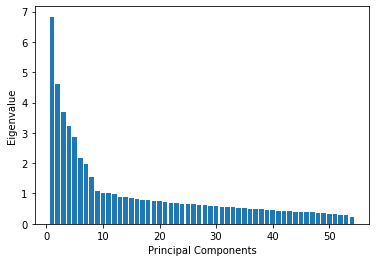

In [3]:
# process of PCA

z = stats.zscore(data)


pca = PCA().fit(z)

e_val = pca.explained_variance_

loading = pca.components_

plt.bar(np.linspace(1,54,54),e_val)
plt.ylabel('Eigenvalue')
plt.xlabel('Principal Components')
plt.show()


In [4]:
# Going with Elbow Criterion
# We see a sharp decrease between second and third eigenvalues
# Take the first two eigenvalues
# redefine PCA with 2 components

pca_n  = PCA(n_components=2).fit(z)

e_val_n = pca_n.explained_variance_

loading = pca_n.components_

print(np.shape(loading))




(2, 54)


In [5]:
# transform the data based on PCA

trans_data = pca_n.fit_transform(z)*(-1)

print(np.shape(trans_data))

(1097, 2)


In [6]:
# Semantic Interpretation of the loading data
print('These two components provide the direction that accounts for the maximum variance of data')
print('Each coordinate of the component represent the importance of the 54 features in the following direction')

print(loading)





These two components provide the direction that accounts for the maximum variance of data
Each coordinate of the component represent the importance of the 54 features in the following direction
[[-0.17916144  0.10433879 -0.18544047  0.18683954 -0.17162179  0.14523754
  -0.17214608  0.10896313 -0.16319405 -0.15658472 -0.23887433  0.05767257
  -0.1759438   0.0968417  -0.12187787 -0.23532441 -0.12106965  0.11172748
   0.10363056 -0.09603448  0.16693482 -0.12946089  0.14169427 -0.15135712
  -0.1675479  -0.15133391  0.1533786  -0.16734954  0.10177906 -0.10907264
   0.14177718 -0.17323031 -0.19072237 -0.16864315  0.02915397 -0.22778915
   0.09897918 -0.15443611  0.12643091 -0.13692425  0.05286577 -0.13927623
   0.091501   -0.09518715 -0.03509124  0.08413977  0.09786817 -0.02556874
  -0.03660917  0.09666058 -0.05166916 -0.06704433 -0.03366552  0.02978331]
 [-0.09809297 -0.07546358 -0.04261098 -0.18608505 -0.13018947 -0.00782765
  -0.02046033 -0.08988487  0.18826259 -0.1529028  -0.05082985 -0.

2) Plot the data from columns 421-474 in the new coordinate system, where each dot represents a person, and the axes represent the factors you found in 1). Hint: If you identified more than 2 meaningful factors, it is a good idea to create several 2D (X vs. Y) subplots for better interpretability

Text(0, 0.5, 'Second maximal direction wise')

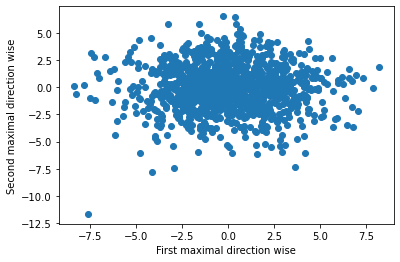

In [7]:
# Plotting of the translated data in new coordinate system
plt.scatter(trans_data[:,0],trans_data[:,1])
plt.xlabel('First maximal direction wise')
plt.ylabel('Second maximal direction wise')




3) Identify clusters in this new space. Use a method of your choice (e.g. kMeans, DBScan, hierarchical clustering) to do so. Determine the optimal number of clusters and identify which cluster a given user is part of.

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import seaborn as sns
import sklearn.cluster as cluster

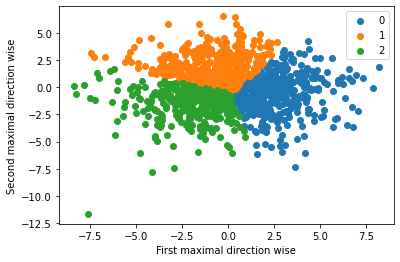

In [9]:
# conducting a preliminary clustering
# kmeans 3 clustering

kMeans = KMeans(n_clusters = 3)

label = kMeans.fit_predict(trans_data)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(trans_data[label==i,0],trans_data[label==i,1],label = i)
plt.legend()
plt.xlabel('First maximal direction wise')
plt.ylabel('Second maximal direction wise')
plt.show()




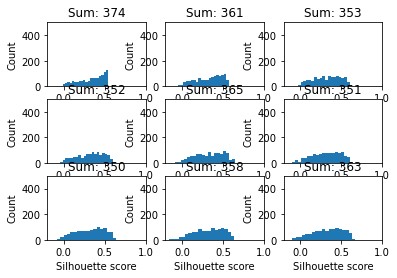

In [10]:
# Sillhoette method of finding optimal 
numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1]) # init container to store sums
Q[:] = np.NaN # convert to NaN

# Compute kMeans:
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = KMeans(n_clusters = int(ii)).fit(trans_data) # compute kmeans
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(trans_data,cId) # compute the mean silhouette coefficient of all samples
    # print(s.shape)
    Q[ii-2] = sum(s) # take sum
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(-0.2,1)
    plt.ylim(0,500)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer

Text(0, 0.5, 'Sum of silhouette scores')

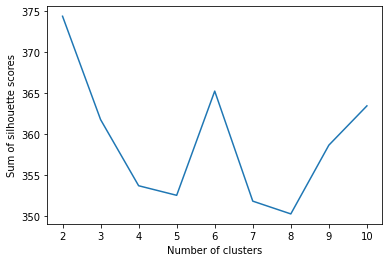

In [11]:
plt.plot(np.linspace(2,10,numClusters),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')

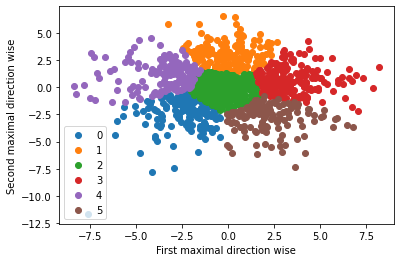

In [12]:
# Aside from choosing the 1 cluster
# 6 seems like a reasonable cluster to consider
kMeans = KMeans(n_clusters = 6)

label = kMeans.fit_predict(trans_data)

u_labels = np.unique(label)

for i in u_labels:
    plt.scatter(trans_data[label==i,0],trans_data[label==i,1],label = i)
plt.legend()
plt.xlabel('First maximal direction wise')
plt.ylabel('Second maximal direction wise')
plt.show()

4) Use these principal components and/or clusters you identified to build a classification model of your choice (e.g. logistic regression, kNN, SVM, random forest), where you predict the movie ratings of all movies from the personality factors identified before. Make sure to use cross-validation methods to avoid overfitting and assess the accuracy of your model by stating its AUC.

In [13]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

movie_data = df1.iloc[:,:400]

avg = movie_data.mean(axis = 0, skipna = True)

movie_data.fillna(avg, inplace = True)

# Artificially setting the movie ratings into two classification
# 0-2 Low
# 3-5 high

movie_data = movie_data.to_numpy()
movie_data[movie_data<3] = 0
movie_data[movie_data>= 3] = 1




print(np.shape(movie_data))
print(movie_data)



(1097, 400)
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [14]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(trans_data, movie_data[:,0], test_size=0.2)

def mean_squared_loss(y_pred,y):
    return np.sum((y_pred - y)**2)/(2*len(y))

regressor=LogisticRegression()
regressor.fit(X_train, y_train)
preds=regressor.predict(X_test)

print(np.shape(X_train))

(877, 2)


Splits: 877


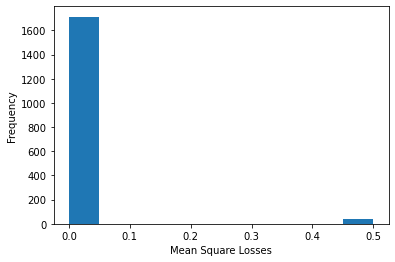

In [15]:
# Leave one out no loss
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
losses=[]
accuracy = [NameError]
print("Splits: %d" % loo.get_n_splits(X_train))
for i in range(np.shape(trans_data)[1]):
    X_train, X_test, y_train, y_test = train_test_split(trans_data, movie_data[:,i], test_size=0.2, random_state=0)
    for train_index, val_index in loo.split(X_train):
        train_x, train_y = X_train[train_index,:], y_train[train_index]
        val_x, val_y = X_train[val_index,:], y_train[val_index]
        regressor= LogisticRegression().fit(train_x, train_y)
        preds=regressor.predict(val_x)
        losses.append(mean_squared_loss(preds, val_y))

plt.hist(losses)
plt.xlabel("Mean Square Losses")
plt.ylabel("Frequency")
plt.show()

In [16]:
predd = regressor.predict(val_x)
print(np.shape(movie_data)[1])

400


Splits: 10


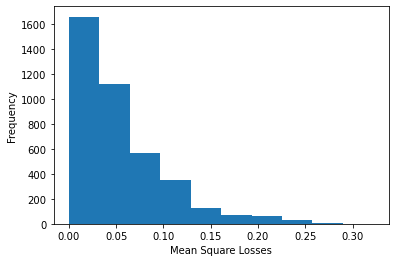

In [17]:
from sklearn.model_selection import KFold
loo = KFold(10)
losses=[]
accuracy = []

print("Splits: %d" % loo.get_n_splits(X_train))
for i in range(np.shape(movie_data)[1]):
    n = 0
    sum =0

    X_train, X_test, y_train, y_test = train_test_split(trans_data, movie_data[:,i], test_size=0.2, random_state=0)
    for train_index, val_index in loo.split(X_train):
        n += 1
        train_x, train_y = X_train[train_index,:], y_train[train_index]
        val_x, val_y = X_train[val_index,:], y_train[val_index]
        regressor= LogisticRegression().fit(train_x, train_y)
        preds=regressor.predict(val_x)
        losses.append(mean_squared_loss(preds, val_y))
        sum += accuracy_score(val_y, preds)
    avg = sum/n
    accuracy.append(avg)




plt.hist(losses)
plt.xlabel("Mean Square Losses")
plt.ylabel("Frequency")
plt.show()

In [18]:
print("Accuracy score :", np.mean(accuracy))


Accuracy score : 0.8930471852142111


5) Create a neural network model of your choice to predict movie ratings, using information from all 477 columns. Make sure to comment on the accuracy of this model.

In [19]:

X = data
# one arbitary movie 
Yt = movie_data[:,8]

X = data.T
Yt = Yt.reshape(1,np.shape(Yt)[0])

In [20]:
Yt.shape

(1, 1097)

In [21]:
from sklearn.preprocessing import StandardScaler
# We retain our scaler "sc" in case we need to invert our inputs
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
X.shape

(54, 1097)

In [22]:
#input
n0 = 54
# number of hidden units
n1 = 20
# number of outputs
n2 = 1
# number of samples
m = 100

# We initialize our weights in a random normal fashion to aid the backpropagation
W1 = np.random.randn(n1,n0) * 0.01
W2 = np.random.randn(n2,n1) * 0.01

# We may initailize the biases as 0 without hampering backpropagation
B1 = np.zeros((n1,1))
B2 = np.zeros((n2,1))

In [23]:
def sigmoid(arr):
    return 1/(1+np.exp(-arr))

In [24]:
# forward propagation

# As explained, the output of first layer can be obtained by taking the dot product of weights and inputs and then
# broadcasting the biases
Z1 = W1.dot(X) + B1
# activating the first layer (the hidden layer)
A1 = sigmoid(Z1)

# The next layer uses output of previous layer as input
Z2 = W2.dot(A1) + B2
# The decision
A2 = sigmoid(Z2)

In [27]:
# backprop

# For sigmoid backprop and binary logloss, our derivative of cost w.r.t Z2 is:
dZ2 = A2 - Yt
# This is a formula you guys will need to commit to memory or use as a reference. It requires quite a bit of work to derive
dW2 = (1/m) * (dZ2.dot(A1.T))
# Dervative of biases is usually just what derivative of weights is, excluding the multiplication with inputs from previous layer
dB2 = (1/m) * (dZ2.mean(axis = 1,keepdims = True))

# Another formula to remember dZ(of layer L) = W(of layer L).T.dot(dZ(L+1)) * derivative expression
# The derivative expression for sigmoid is A1 * (1 - A1).
# If the activation of this layer had been tanh, the derivative expression would have been (1 - A1**2)
dZ1 = (W2.T).dot(dZ2) * A1 * (1 - A1)
dW1 = (1/m) * (dZ1.dot(X.T))
dB1 = (1/m) * (dZ1.mean(axis = 1,keepdims = True)) 

In [28]:
# Updating parameters
lr = 0.01

W1 = W1 - lr * dW1
W2 = W2 - lr * dW2

B1 = B1 - lr * dB1
B2 = B2 - lr * dB2

In [29]:
# Binary cross entropy loss
def logCost(A,Y):
    return -(Y*np.log(A) + (1-Y)*np.log(1-A)).sum()

In [31]:
# testing
logCost(A2,Yt)

759.2617934331288

In [32]:
n0 = 54
n1 = 1
n2 = 1
m = 100

W1 = np.random.randn(n1,n0) * 0.01
W2 = np.random.randn(n2,n1) * 0.01

B1 = np.zeros((n1,1))
B2 = np.zeros((n2,1))

costs = []

In [35]:
epochs = 10000
lr = 2

for i in range(epochs):
    # forward propagation

    Z1 = W1.dot(X) + B1
    A1 = sigmoid(Z1)

    Z2 = W2.dot(A1) + B2
    A2 = sigmoid(Z2)
    
    # print cost
    cost = logCost(A2,Yt)
    if i%50 == 0:
        print("cost after",str(i),"iterations is:",cost)
    costs.append(cost)
    
    # backprop
    dZ2 = A2 - Yt
    dW2 = (1/m) * (dZ2.dot(A1.T))
    dB2 = (1/m) * (dZ2.mean(axis = 1,keepdims = True))

    dZ1 = (W2.T).dot(dZ2) * A1 * (1 - A1)
    dW1 = (1/m) * (dZ1.dot(X.T))
    dB1 = (1/m) * (dZ1.mean(axis = 1,keepdims = True)) 
    
    # weight update
    W1 = W1 - lr * dW1
    W2 = W2 - lr * dW2

    B1 = B1 - lr * dB1
    B2 = B2 - lr * dB2

cost after 0 iterations is: 200.2029752399494
cost after 50 iterations is: 200.19988566011727
cost after 100 iterations is: 200.19682490745328
cost after 150 iterations is: 200.1937926389192
cost after 200 iterations is: 200.19078851627688
cost after 250 iterations is: 200.18781220600505
cost after 300 iterations is: 200.18486337921865
cost after 350 iterations is: 200.18194171158981
cost after 400 iterations is: 200.17904688327025
cost after 450 iterations is: 200.17617857881586
cost after 500 iterations is: 200.17333648711258
cost after 550 iterations is: 200.17052030130395
cost after 600 iterations is: 200.1677297187204
cost after 650 iterations is: 200.1649644408099
cost after 700 iterations is: 200.16222417306972
cost after 750 iterations is: 200.15950862498048
cost after 800 iterations is: 200.15681750994085
cost after 850 iterations is: 200.15415054520395
cost after 900 iterations is: 200.15150745181478
cost after 950 iterations is: 200.14888795454934
cost after 1000 iterations 

In [36]:
pred = np.zeros(A2.shape)

In [37]:
pred[A2 > 0.5] = 1

In [39]:
A = pred - Yt

In [44]:
# Accuracy
1- np.sum(A[np.where(A>0)])/np.shape(A)[1]

0.9927073837739289